# Oops... Nothing Here..  So, you are on your own this time.

# Data 

In [59]:
!pip install wget
import wget
import sys
print(sys.version)
!pip install twython

3.6.8 (default, Oct  7 2019, 12:59:55) 
[GCC 8.3.0]


In [0]:
#wget.download("https://github.com/MIE451-1513-2019/course-datasets/raw/master/reviews.zip")
#!unzip reviews.zip

In [61]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree

## Machine Learning
import sklearn
import sklearn.metrics as metrics

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
# Collingwood hotels and places to stay
reviews_df = pandas.read_csv('reviews.csv')
reviews_df.columns = ['filepath','hotelname','reviewtext','overallrating','binaryrating']
reviews_df.head()

,filepath,hotelname,reviewtext,overallrating,binaryrating
0,data/ca/181754/1902154/352223234.html,Luxury Inn,"""Luxury Inn is a budget place to stay for over...",4,positive
1,data/ca/181754/1902154/233541732.html,Luxury Inn,"""Spent one night in the Hotel, clean rooms wit...",2,negative
2,data/ca/181754/1902154/553539440.html,Luxury Inn,"""We stayed there to ski at Blue Mountain but d...",4,positive
3,data/ca/181754/1902154/233938748.html,Luxury Inn,"""I think the title of my review summarizes my ...",1,negative
4,data/ca/181754/1902154/296470150.html,Luxury Inn,"""\nRoom was clean and comfortable. Staff frien...",4,positive


In [0]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pandas.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [64]:
# star rating is between 4-5, binarized as "positive" (1), otherwise, "negative" (0)
reviews_df['groundTruth'] = reviews_df['binaryrating'].map(lambda x: 0 if x=='negative' else 1)
reviews_df.head()

,filepath,hotelname,reviewtext,overallrating,binaryrating,groundTruth
0,data/ca/181754/1902154/352223234.html,Luxury Inn,"""Luxury Inn is a budget place to stay for over...",4,positive,1
1,data/ca/181754/1902154/233541732.html,Luxury Inn,"""Spent one night in the Hotel, clean rooms wit...",2,negative,0
2,data/ca/181754/1902154/553539440.html,Luxury Inn,"""We stayed there to ski at Blue Mountain but d...",4,positive,1
3,data/ca/181754/1902154/233938748.html,Luxury Inn,"""I think the title of my review summarizes my ...",1,negative,0
4,data/ca/181754/1902154/296470150.html,Luxury Inn,"""\nRoom was clean and comfortable. Staff frien...",4,positive,1


In [65]:
order = [-1,0,2,1,3]
reviews = reviews_df['reviewtext'].values
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewtext','vader'])
reviewDF['rating'] = reviews_df['overallrating']
reviewDF['groundTruth'] = reviews_df['groundTruth']
reviewDF['binaryrating'] = reviews_df['binaryrating']
reviewDF['hotelname'] = reviews_df['hotelname']
reviewDF[reviewDF.columns[order]]

100%|██████████| 849/849 [00:01<00:00, 741.91it/s]


,hotelname,reviewtext,rating,vader,groundTruth
0,Luxury Inn,"""Luxury Inn is a budget place to stay for over...",4,0.9238,1
1,Luxury Inn,"""Spent one night in the Hotel, clean rooms wit...",2,-0.0900,0
2,Luxury Inn,"""We stayed there to ski at Blue Mountain but d...",4,0.9598,1
3,Luxury Inn,"""I think the title of my review summarizes my ...",1,0.5726,0
4,Luxury Inn,"""\nRoom was clean and comfortable. Staff frien...",4,0.8830,1
...,...,...,...,...,...
844,Living Water Resort &amp; Spa,"""My husband and I were excited for some qualit...",4,0.9856,1
845,Living Water Resort &amp; Spa,"""I liked everything at this place - amazing vi...",5,0.9768,1
846,Living Water Resort &amp; Spa,"""We love going to Collinwood and living water ...",3,0.9257,0
847,Living Water Resort &amp; Spa,"""Employees are nice , the resort is basic same...",2,0.6068,0


In [66]:
num_hotel = reviewDF['hotelname'].unique()
len(num_hotel)

17

# Q1

## Q1(a)

In [67]:
reviewDF_ave = reviewDF.groupby(by='hotelname')['vader','rating'].mean().reset_index()
reviewDF_ave

,hotelname,vader,rating
0,Alpine Lodge,0.828140,3.200000
1,Comfort Inn &amp; Suites,0.788377,3.770000
2,Craigleith Manor Bed and Breakfast,0.957974,4.913043
3,Days Inn &amp; Suites by Wyndham Collingwood,0.736157,4.010000
4,Georgian Bay Hotel Trademark Collection by Wyn...,0.662988,3.860000
5,Joseph Lawrence House,0.865813,4.933333
6,Living Stone Golf Resort,0.581762,3.560000
7,Living Water Resort &amp; Spa,0.637539,3.640000
8,Luxury Inn,0.834938,3.928571
9,Mariner Motor Hotel,0.673832,3.240000


##Q1(b)

In [0]:
top_vader = reviewDF_ave.sort_values(by = ['vader'], ascending = False)[0:5].drop(columns = ['rating'])
bottom_vader = reviewDF_ave.sort_values(by = ['vader'], ascending = True)[0:5].drop(columns = ['rating'])

In [69]:
# rank top5 by average vader
top_vader

,hotelname,vader
15,Vandermarck Boutique Hotel,0.981500
2,Craigleith Manor Bed and Breakfast,0.957974
16,Willow Trace Bed and Breakfast,0.932242
11,Nottawasaga Hideaway Bed &amp; Breakfast,0.879300
5,Joseph Lawrence House,0.865813


In [70]:
# rank bottom5 by average vader
bottom_vader

,hotelname,vader
12,Pleasant Manor Motel,0.006033
10,Milestone Motel,0.137640
13,Relax Inn Collingwood,0.481259
6,Living Stone Golf Resort,0.581762
7,Living Water Resort &amp; Spa,0.637539


In [0]:
top_gT = reviewDF_ave.sort_values(by = ['rating'], ascending = False)[0:5].drop(columns = ['vader'])
bottom_gT = reviewDF_ave.sort_values(by = ['rating'], ascending = True)[0:5].drop(columns = ['vader'])

In [72]:
# rank top5 by average groundTruth rating star
top_gT

,hotelname,rating
15,Vandermarck Boutique Hotel,5.000000
5,Joseph Lawrence House,4.933333
2,Craigleith Manor Bed and Breakfast,4.913043
16,Willow Trace Bed and Breakfast,4.797468
11,Nottawasaga Hideaway Bed &amp; Breakfast,4.761905


In [73]:
# rank bottom5 by average groundTruth rating star
bottom_gT

,hotelname,rating
12,Pleasant Manor Motel,2.0000
13,Relax Inn Collingwood,3.0625
0,Alpine Lodge,3.2000
10,Milestone Motel,3.2000
9,Mariner Motor Hotel,3.2400


###Show both top-5 and bottom-5 for both ranking methods. Do they agree or are there interesting differences?


The two methods basically agree for both top-5, with only slight differences of ranking places. There are differences for bottom-5 based on the two different methods, but the bottom one is consistent ranked from both methods. 





In [0]:
#reviews_df['reviewtext'].values

#Q2

##Q2(a)

In [75]:
pos_reviews = []
neg_reviews = []
for i in range(len(reviews_df)):
  if reviews_df['binaryrating'][i] == 'positive':
    pos_reviews.append(reviews_df['reviewtext'][i])
  else:
    neg_reviews.append(reviews_df['reviewtext'][i])

print(len(pos_reviews))
print(len(neg_reviews))

593
256


In [0]:
pos_reviews = np.asarray(pos_reviews)
neg_reviews = np.asarray(neg_reviews)

In [0]:
# Top-k frequent terms
def top_k(reviewslist,k):
  stop = set(stopwords.words('english'))
  
  counter = Counter()
  for review in reviewslist:
    counter.update([word.lower() 
                    for word 
                    in re.findall(r'\w+', review) 
                    if word.lower() not in stop and len(word) > 2])
  topk = counter.most_common(k)
          

  #Find out if a particular review has the word from topk list
  freqReview = []
  for i in range(len(reviewslist)):
      tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviewslist[i])])
      topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
      freqReview.append(topkinReview)


  #Prepare freqReviewDf
  freqReviewDf = pandas.DataFrame(freqReview)
  dfName = []
  for c in topk:
      dfName.append(c[0])
  freqReviewDf.columns = dfName
  #finalreviewDf = reviewDF.join(freqReviewDf)
  finaldf = reviews_df[['hotelname','overallrating','binaryrating','groundTruth']].join(freqReviewDf)
  return topk, finaldf

In [78]:
pos_topk, pos_topk_df = top_k(pos_reviews,50)
headers = ['word', 'frequency']
pandas.DataFrame(pos_topk, columns = headers)

#pos_topk_df

,word,frequency
0,room,474
1,great,344
2,breakfast,337
3,stay,310
4,clean,303
5,hotel,276
6,good,237
7,staff,227
8,would,209
9,stayed,198


In [79]:
neg_topk,neg_topk_df = top_k(neg_reviews,50)
pandas.DataFrame(neg_topk, columns = headers)

#neg_topk_df.head(50)

,word,frequency
0,room,399
1,hotel,160
2,one,138
3,stay,135
4,would,131
5,place,126
6,night,121
7,staff,118
8,good,110
9,rooms,107


###Do you note anything interesting and/or locale-specific about these top-ranked words?


The most-common words appear in both positive and negative reviews, some neutral words, such as, "room", "breakfast", "hotel", "staff", "stay" etc. Besides, it is interesting to see that even in the negative reviews, there are many positive words, such as "friendly", "nice".

##Q2(b)

In [0]:
tagger = PerceptronTagger()
pos_tag = tagger.tag
grammar = r"""
  NBAR:
      {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
      
  NP:
      {<NBAR>}
      {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

# Create phrase tree
chunker = nltk.RegexpParser(grammar)
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stop = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()


In [0]:
# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stop)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [0]:
def get_noun_phrase(reviewslist,k):
  stop = set(stopwords.words('english'))
  # stop.add('hotel')
  # stop.add('room')
  # stop.add('rooms')
  # stop.add('stay')
  # stop.add('staff')

  counter = Counter()
  for review in reviewslist:
    counter.update([word for word in flatten([word
                    for word 
                    in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review))))]) 
                    if word.lower() not in stop and len(word) > 2])
  topk = counter.most_common(k) 


  #Find out if a particular review has the word from topk list
  freqReview = []
  for i in range(len(reviewslist)):
      tempCounter = Counter(flatten([word for word in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviewslist[i]))))]))
      topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
      freqReview.append(topkinReview)


  #Prepare freqReviewDf
  freqReviewDf = pandas.DataFrame(freqReview)
  dfName = []
  for c in topk:
      dfName.append(c[0])
  freqReviewDf.columns = dfName
  #finalreviewDf = reviewDF.join(freqReviewDf)
  finaldf = reviews_df[['hotelname','overallrating','binaryrating','groundTruth']].join(freqReviewDf)
  return topk, finaldf     

In [83]:
pos_np, pos_np_df = get_noun_phrase(pos_reviews,50)
headers = ['noun phrase', 'frequency']
pandas.DataFrame(pos_np, columns = headers)

#pos_np_df.head(20)

,noun phrase,frequency
0,blue mountain,63
1,willow trace,35
2,front desk,25
3,blue mountain villag,20
4,minut drive,20
5,hot tub,17
6,collingwood area,16
7,queen bed,14
8,findlay hous,13
9,great place,12


In [84]:
neg_np, neg_np_df = get_noun_phrase(neg_reviews,50)
pandas.DataFrame(neg_np, columns = headers)
#neg_np_df

,noun phrase,frequency
0,front desk,40
1,blue mountain,19
2,day inn,13
3,next day,8
4,hot tub,8
5,continent breakfast,7
6,coffe maker,6
7,custom servic,6
8,night stay,6
9,holiday inn,6


### Reusult

Using noun phrases is a lot more informative than results from (a). At least, we know what aspects the reviewers were writing. For example, in the negative reivews, there are "bad smell", "bed bug" which directly tells us their reviews about that hotel.
However, there are still positive noun phrases in the negative reviews, such as "good location", and "good size".

#Q3

##Q3(a)

In [0]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='binaryrating'):
  miScore = []
  for word in topk:
      miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
  miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
  miScoredf.columns = ['Word','MI Score']
  return miScoredf

In [86]:
pos_miScoredf = getMI(pos_topk, pos_topk_df)
pos_miScoredf

,Word,MI Score
47,leanne,0.209525
7,staff,0.208132
13,friendly,0.207249
28,day,0.205191
25,close,0.204741
31,beautiful,0.204487
24,blue,0.203945
29,bed,0.203840
30,location,0.203828
6,good,0.203607


In [87]:
neg_miScoredf = getMI(neg_topk,neg_topk_df)
neg_miScoredf

,Word,MI Score
5,place,0.465875
33,also,0.462888
46,u2019t,0.462780
39,motel,0.462188
25,resort,0.461875
16,breakfast,0.461779
37,booked,0.461683
18,bed,0.461465
45,friendly,0.461405
48,got,0.461262


###Do you note anything interesting and/or locale-specific about these top-ranked words?

The mutual information is a measure of similarity (how dependent) of one word and the sentiment of that review (positive or negative).
In the negative reviews, the mutual information is generally higher than those in the positvie reviews, that is may be the positive reviews are not that starightforward and clear. But negative reviews are commonly focusing on the aspects the reviewers don't like. 


##Q3(b)

In [88]:
pos_np_miScoredf = getMI(pos_np, pos_np_df)
pos_np_miScoredf

,Word,MI Score
1,willow trace,0.209750
6,collingwood area,0.208683
31,continent breakfast,0.205603
5,hot tub,0.205588
42,relax inn,0.205221
34,pool tabl,0.205221
0,blue mountain,0.205031
7,queen bed,0.205018
2,front desk,0.204267
43,king bed,0.204204


In [89]:
neg_np_miScoredf = getMI(neg_np, neg_np_df)
neg_np_miScoredf

,Word,MI Score
2,day inn,0.462707
5,continent breakfast,0.461873
32,indoor pool,0.461773
34,last room,0.461773
6,coffe maker,0.461598
7,custom servic,0.461555
14,main street,0.461324
16,queen bed,0.461324
29,good size,0.461051
27,good locat,0.461051


### Results

The results of noun phrases are more informative and more make sense. It is similar that the mutual information is higher in positive reviews than those in the negative reviews, meaning that the negative most-common words more dependent of the negative reviews.

#Q4

##Q4(a)

In [0]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['binaryrating']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['binaryrating']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

def pmiIndivCal(df,x,gt, label_column='binaryrating'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk, label_column='binaryrating'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [0]:
topk, topk_df = top_k(reviews_df['reviewtext'].values,50)

In [92]:
topk_df

,hotelname,overallrating,binaryrating,groundTruth,room,stay,hotel,breakfast,clean,great,good,staff,would,stayed,time,one,nice,night,rooms,place,pool,well,collingwood,friendly,back,area,comfortable,also,bed,resort,day,get,could,blue,like,really,mountain,desk,nthe,close,bathroom,front,location,even,check,two,recommend,service,food,next,made,everything,experience,home
0,Luxury Inn,4,positive,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,Luxury Inn,2,negative,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0
2,Luxury Inn,4,positive,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Luxury Inn,1,negative,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0
4,Luxury Inn,4,positive,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,Living Water Resort &amp; Spa,4,positive,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
845,Living Water Resort &amp; Spa,5,positive,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
846,Living Water Resort &amp; Spa,3,negative,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
847,Living Water Resort &amp; Spa,2,negative,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [93]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(topk_df, topk, label_column='binaryrating')

100%|██████████| 50/50 [00:00<00:00, 55.11it/s]


In [94]:
#Sorted top pmi words for positive reviews
pmiposlist.sort_values('pmi',ascending=0)

,word,pmi
5,great,0.215764
22,comfortable,0.172279
29,blue,0.158194
35,close,0.152373
32,mountain,0.141800
49,home,0.138624
3,breakfast,0.135721
19,friendly,0.132091
42,recommend,0.131648
18,collingwood,0.120055


In [95]:
#Sorted top pmi words for positive reviews
pmineglist.sort_values('pmi',ascending=0)

,word,pmi
33,desk,0.573557
39,even,0.549795
27,get,0.527088
37,front,0.479301
28,could,0.465569
11,one,0.427482
41,two,0.422738
34,nthe,0.337743
36,bathroom,0.337112
13,night,0.324418


###Do you note anything interesting and/or locale-specific about these top-ranked words?


Pointwise mutual information measures how more often the particular word occured in the sentiment class.
Compared to positive reviews, the pmi of negative reviews are higher, this may be because positive reviewers can comment on various aspects, while negative reviewers commented on only one or two aspects, which is more focused.

##Q4(b)

In [0]:
topk_np, topk_np_df = get_noun_phrase(reviews_df['reviewtext'].values,50)

In [97]:
pmiposnplist, pminegnplist, pminpdf = pmiForAllCal(topk_np_df, topk_np, label_column='binaryrating')

100%|██████████| 50/50 [00:00<00:00, 56.51it/s]


In [98]:
pmiposnplist.sort_values('pmi',ascending=0)

,word,pmi
25,short drive,0.358865
32,cook class,0.358865
26,scandinav spa,0.358865
29,great stay,0.358865
31,downtown collingwood,0.358865
33,great host,0.358865
2,willow trace,0.358865
6,minut drive,0.307571
17,comfort bed,0.278822
21,luxuri inn,0.263555


In [99]:
pminegnplist.sort_values('pmi',ascending=0)

,word,pmi
30,coffe maker,0.688056
1,front desk,0.643885
45,time share,0.639266
40,nthe room,0.611095
4,day inn,0.557028
9,next day,0.505735
27,main street,0.505735
49,good size,0.505735
12,continent breakfast,0.436742
41,park lot,0.387952


###Result

The trend is very similar to previous result, stronger correlation for negative reviews, and the top noun phrases are more frequent.

##Q4(c)

In [100]:
#Extract a list of hotels
hotelnames = reviews_df['hotelname'].unique()
hotelnames

array(['Luxury Inn', 'Willow Trace Bed and Breakfast',
       'Nottawasaga Hideaway Bed &amp; Breakfast', 'Pleasant Manor Motel',
       'Joseph Lawrence House',
       'Days Inn &amp; Suites by Wyndham Collingwood',
       'Mariner Motor Hotel', 'Alpine Lodge', 'Milestone Motel',
       'Relax Inn Collingwood', 'The Findlay House',
       'Craigleith Manor Bed and Breakfast', 'Comfort Inn &amp; Suites',
       'Living Stone Golf Resort',
       'Georgian Bay Hotel Trademark Collection by Wyndham',
       'Vandermarck Boutique Hotel', 'Living Water Resort &amp; Spa'],
      dtype=object)

In [0]:
def getHotelRank(df, measure):
    #Rank the hotel by measuring rating score
    hotelRating = []
    for hotel in hotelnames:
        itemDf = df.loc[df['hotelname']==hotel]
        hotelRating.append([hotel,itemDf[measure].mean()])
    hotelRatingDfGt = pandas.DataFrame(hotelRating)
    hotelRatingDfGt.columns=['hotelname','avgRatingScore']
    hotelRatingDfGt = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0)
    return hotelRatingDfGt

In [0]:
HotelRank_gt = getHotelRank(reviews_df, measure='overallrating')

In [103]:
top1 = HotelRank_gt.head(1)
topname = top1['hotelname'].values[0]
topname

'Vandermarck Boutique Hotel'

In [104]:
bottom1 = HotelRank_gt.tail(1)
bottomname = bottom1['hotelname'].values[0]
bottomname

'Pleasant Manor Motel'

In [105]:
top1_reviews = reviewDF[reviewDF['hotelname']==topname]['reviewtext'].values
top1, top1_df = top_k(top1_reviews,50)
pandas.DataFrame(top1,columns=['word','count'])

,word,count
0,hotel,6
1,stayed,4
2,front,4
3,everything,4
4,one,4
5,loved,3
6,desk,3
7,room,3
8,could,3
9,well,3


In [106]:
bottom1_reviews = reviewDF[reviewDF['hotelname']==bottomname]['reviewtext'].values
bottom1, bottom1_df = top_k(bottom1_reviews,50)
pandas.DataFrame(bottom1,columns=['word','count'])

,word,count
0,room,38
1,motel,23
2,night,19
3,bed,17
4,place,14
5,bathroom,13
6,back,12
7,stay,11
8,stayed,10
9,cheap,9


In [107]:
top1_np, top1__np_df = get_noun_phrase(top1_reviews,50)
pandas.DataFrame(top1_np,columns=['noun phrase','count'])

,noun phrase,count
0,front desk,3
1,downtown collingwood,2
2,vandermarck hotel,1
3,wed anniversari,1
4,restaur bar,1
5,u2019t mind,1
6,beauti fireplac cool spot,1
7,love cozi hotel,1
8,comfort sleep,1
9,effici check,1


In [108]:
bottom1_np, bottom1__np_df = get_noun_phrase(bottom1_reviews,50)
pandas.DataFrame(bottom1_np,columns=['noun phrase','count'])

,noun phrase,count
0,bed bug,3
1,motel room,2
2,day inn,2
3,previou review,2
4,u2019t trust,2
5,front desk,2
6,face cloth,2
7,bathroom window,2
8,pleasant manor,2
9,wasaga beach,2


###Result

The results are more informative when compared only top oen and bottom one, it is straightforward and intuitive from the most-common noun phrases to see what aspects the reviewers are commenting on. To be specific, the bottom one hotel has "bed bug", and "samll fridge", and other aspects need to be improved.

#Q5

##Q5(a) Histogram 

##(i)

In [0]:
def getHistogram(measure, title):
    if measure=='both':
        x = [reviewDF['rating'].values/5]
        y = [reviewDF['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='x')
        plt.hist(y, bins, label='y')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(reviewDF[measure].values)
        plt.title(title)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        fig = plt.gcf()

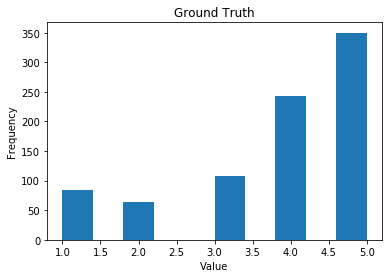

In [110]:
getHistogram('rating', 'Ground Truth')

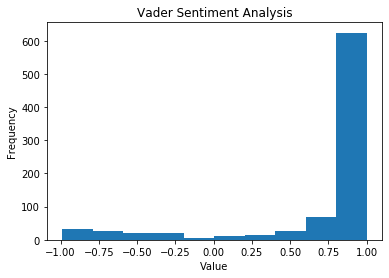

In [111]:
getHistogram('vader', 'Vader Sentiment Analysis')

###Do you notice any interesting differences?

The vader and groundTruth scores are basically consistent, the trend is similar, much more reviews from higher scored hotels.

##(ii)

In [0]:
def getHistogram_numperhotel(reviewDF):
  hotelnames = reviewDF['hotelname'].unique().tolist()
  counts = reviewDF.groupby(by='hotelname')['reviewtext'].count().values.tolist()
  index = np.arange(len(hotelnames))
  plt.figure(figsize=(10,6))
  plt.bar(index,counts)
  plt.xlabel('Hotel Names',fontsize=12)
  plt.ylabel('Number of Reviews',fontsize=12)
  plt.xticks(index, hotelnames, fontsize=10, rotation=90)
  plt.title('Number of Reviews per Hotel', fontsize=15)
  plt.show()


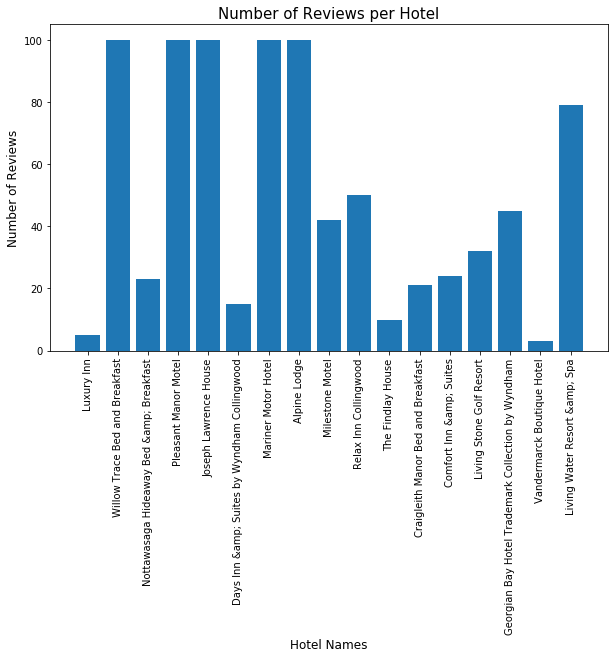

In [114]:
getHistogram_numperhotel(reviewDF)

###Do you notice any interesting trends? Are these expected?

I expected that the top hotels have more reviews, and the ratings and polarity are more stable. But, there are not sufficient datapoints, the trend is not so obvious.

##Q5(b) Boxplots

##(i)

In [0]:
def get_boxplot(measure, toprank):
  HotelRank = getHotelRank(reviewDF, measure)
  #Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
  if toprank == True:
    tp5gthotel = HotelRank.sort_values('avgRatingScore',ascending=True).head(5)
  else:
    tp5gthotel = HotelRank.sort_values('avgRatingScore',ascending=True).tail(15) 
  tp5gthotel['hotelname'].values


  vandermarck = reviewDF.loc[reviewDF['hotelname'] == tp5gthotel['hotelname'].values[0]][measure]
  joseph = reviewDF.loc[reviewDF['hotelname'] == tp5gthotel['hotelname'].values[1]][measure]
  craigleith = reviewDF.loc[reviewDF['hotelname'] == tp5gthotel['hotelname'].values[2]][measure]
  willow = reviewDF.loc[reviewDF['hotelname'] == tp5gthotel['hotelname'].values[3]][measure]
  nottawasaga = reviewDF.loc[reviewDF['hotelname'] == tp5gthotel['hotelname'].values[4]][measure]

  data = [vandermarck,joseph,craigleith,willow,nottawasaga]
  # multiple box plots on one figure
  plt.figure()
  plt.boxplot(data)
  plt.show()

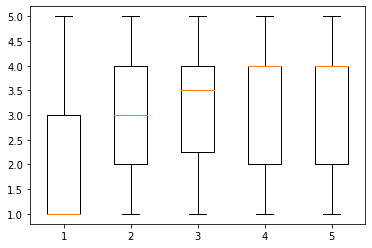

In [116]:
get_boxplot(measure = 'rating',toprank = True)

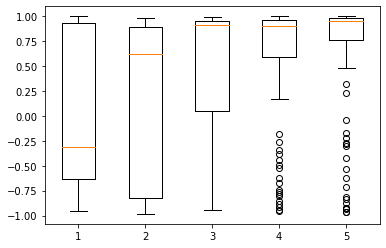

In [117]:
get_boxplot(measure = 'vader', toprank = True)

##(ii)

In [118]:
HotelRank_mean_gt = getHotelRank(reviewDF, 'rating')[0:5]['avgRatingScore'].mean()
HotelRank_var_gt = getHotelRank(reviewDF, 'rating')[0:5]['avgRatingScore'].var()

print("mean of groundTruth for top-5 ranked hotels is: {0}".format(HotelRank_mean_gt))
print("variance of groundTruth for top-5 ranked hotels is: {0}".format(HotelRank_var_gt))

mean of groundTruth for top-5 ranked hotels is: 4.8811499855858695
variance of groundTruth for top-5 ranked hotels is: 0.009771915336745728


In [119]:
HotelRank_mean_vader = getHotelRank(reviewDF, 'vader')[0:5]['avgRatingScore'].mean()
HotelRank_var_vader = getHotelRank(reviewDF, 'vader')[0:5]['avgRatingScore'].var()

print("mean of groundTruth for top-5 ranked hotels is: {0}".format(HotelRank_mean_vader))
print("variance of groundTruth for top-5 ranked hotels is: {0}".format(HotelRank_var_vader))

mean of groundTruth for top-5 ranked hotels is: 0.9233658037057421
variance of groundTruth for top-5 ranked hotels is: 0.0024775426821922867


###Report the mean and variance of the ground truth and Vader sentiment scores for the top-5 ranked hotels according to star rating.


Boxplots are more imformative as it allows you to visually see the spread in the data, and tell how the hotel perform. You will know the median, 25% and 75% quantile and other statistics. 
Mean and variance are only statistics with values.


##Q5(c)

##(i)

Text(0.5, 0, 'Vader Score')

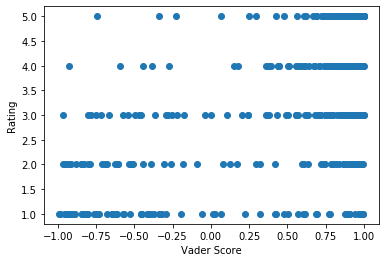

In [120]:
y = reviewDF['rating'].values
x = reviewDF['vader'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

In [0]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

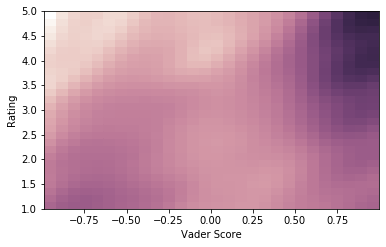

In [122]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
#ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
#ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
# ax2.set_xlim(x.min(), x.max())
# ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

# ax2.set_xlabel('Vader Score')
# ax2.set_ylabel('Rating')

###Do you notice anything interesting? What does this tell you about star ratings vs. Vader sentiment scores? What does this tell you about human ratings and/or Vader sentiment analysis?


The plot shows that the lower vader tend to occure in lower rating, and the trend is similar to higher vader and higher rating. This indicated that vader is translate and standardize the rating, making them between -1 and 1, the reviews polarity is basically consistent with the rating.


##(ii)

In [0]:
reviewDF['review_len'] = reviewDF['reviewtext'].apply(lambda x: len(x.split()))

In [0]:
def get_scatterplot_heatmap(measure):
  y_rl = reviewDF[measure].values
  x_rl = reviewDF['review_len'].values

  k_rl = gaussian_kde(np.vstack([x_rl, y_rl]))
  xi_rl, yi_rl = np.mgrid[x_rl.min():x_rl.max():x_rl.size**0.5*1j,y_rl.min():y_rl.max():y_rl.size**0.5*1j]
  zi_rl = k(np.vstack([xi_rl.flatten(), yi_rl.flatten()]))

  cmap = sns.cubehelix_palette(light=1, as_cmap=True)
  fig = plt.figure(figsize=(6,8))
  ax1 = fig.add_subplot(211)
  ax2 = fig.add_subplot(212)

  ax1.pcolormesh(xi_rl, yi_rl, np.log10(zi.reshape(xi_rl.shape)), cmap=cmap)
  ax2.plot(x_rl, y_rl,"o")

  ax1.set_xlim(x_rl.min(), x_rl.max())
  ax1.set_ylim(y_rl.min(), y_rl.max())
  ax1.set_xlabel('Review_len')
  ax1.set_ylabel(measure)

  ax2.set_xlim(x_rl.min(), x_rl.max())
  ax2.set_ylim(y_rl.min(), y_rl.max())
  ax2.set_xlabel('Review_len')
  ax2.set_ylabel(measure)


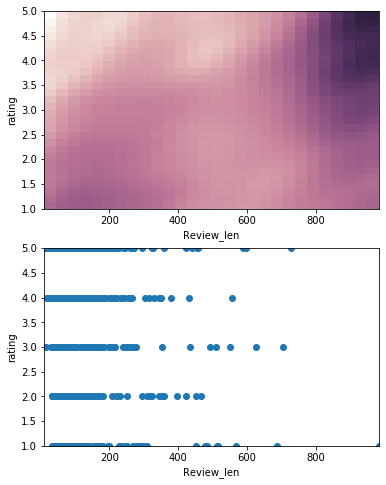

In [125]:
get_scatterplot_heatmap('rating')

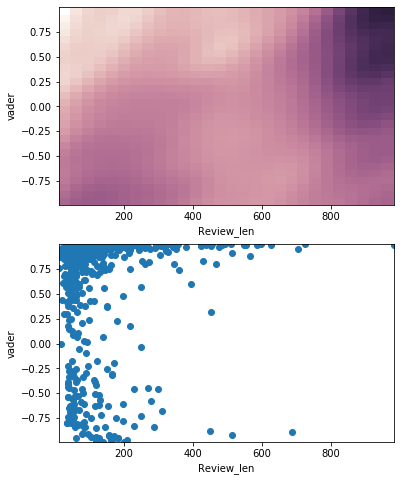

In [126]:
get_scatterplot_heatmap('vader')

###Are there any trends?


The plot shows that the review length is longer for very high or very low ratings and vaders, that means, people tend to say more words when they are very satisfied or very unsatisfied.

##(ii)

Text(0, 0.5, 'average vader')

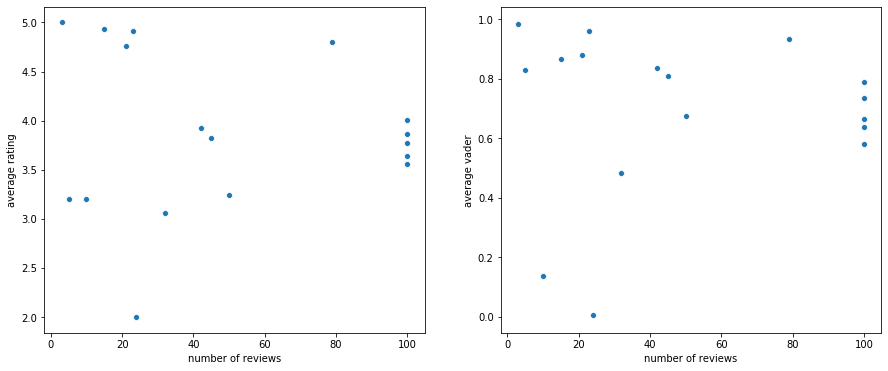

In [127]:
hotelnames = reviewDF['hotelname'].unique().tolist()
counts = reviewDF.groupby(by='hotelname')['reviewtext'].count().values.tolist()
avg_rating = reviewDF.groupby('hotelname')['rating'].mean().tolist()
avg_vader = reviewDF.groupby('hotelname')['vader'].mean().tolist()

fig,ax = plt.subplots(figsize=(15,6))
plt.subplot(121)
sns.scatterplot(counts,avg_rating)
plt.xlabel('number of reviews')
plt.ylabel('average rating')

plt.subplot(122)
sns.scatterplot(counts,avg_vader)
plt.xlabel('number of reviews')
plt.ylabel('average vader')

###Are there any trends?

Hotels with more reviews tend to have higher ratings. In this assignment, the trend is not so obvious, it is probably due to lacking of datapoints, as there are only around 850 reviews in this dataset, which are insufficient.

In [0]:
# def submission():
#     """remove this function before submission
#     """
#     assert False, "I didn't submit assignment on time!"

In [0]:
# submission()